# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
      
---
* [Autoencoder](#Autoencoder)
    * [Denoising Autoencoder](#Denoising-Autoencoder)
    * [Convolutional Autoencoder](#Convolutional-Autoencoder)
* [ Generative Adversarial Network](#Generative-Adversarial-Network)


---
저번시간에는 간단하게 여러종류의 Autoencoder(AE)를 keras blog 참고하여 구현
 - simple, deep, sparse, convolutional AE
 
1. stacked/deep
  - stacked 반복해서 쌓여진 레이어 eg. stacked rnn, lstm 
2. sparse
  - 차원을 늘림(어려움) 
  - 차원을 높이면 많은 데이터가 필요
    - SVM kernel trick 제외하고는 머신러닝에서 차원증가해서 문제 해결하려 하지않음
    - 차원을 추가해서 데이터 분리
  - DL  FCNN, Convolution 크기 계속 줄어듦
  - NN  activation function으로 비선형을 선형으로 구분할수 있도록 바꿈
3. denoising auto-encoder
      - noise와 실제데이터 학습을 통해서 노이즈 제거
 
## Autoencoder

- **이론적 가치**가 있었고 실용적인 기법이 없다고 생각 VAE
- self-suprevised learning : 라벨없이 학습 데이터의 특징을 파악해서 학습하여  찾음 (미래의 기법)
  - 2016 keras 창시자 autoencoder 관련 blog post에서  "...badly outdated!"
- variational autoencoder
    - data 생성하는 모델로써 큰 가치를 갖음
- autoencoder 딥러닝 모델에 많이 적용됨
- convolution : Upsampling2D, padding=same 으로 크기 맞춤

 - 책 추천:IanGoodFellow Deep Learning 교과서

Autoencoder 모델
- 이전에 declarative 한 방법으로 하나 하나 선언
- 객체지향: Model 상속을 통해서 객체로 만들어서 재사용 ,재활용
  - 활용,확장
  - call: 인스턴스된 객체 함수처럼 사용(functional pradigm) closure
  - __init__ , build
  - model, layer 상속
- encoder, decoder 구조를 역순으로 맞춤

- 레이어가 적어서 성능이 안 좋음

- TensorFlow 공식홈페이지 Autoencoder 참고: https://www.tensorflow.org/tutorials/generative/autoencoder

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score  #정형 데이터
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()# unpacking 갯수 맞추어야 해서 _ 관례상 사용하지않는 변수 표시

x_train = x_train.astype('float32') / 255.     
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape) 

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
latent_dim = 64 

class Autoencoder(Model):   #축소된/잠재된 특징을 나타냄  -인스턴스해서 
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim              
    #모델 내에 모델 내장 가능해서 모델 분리
    self.encoder = tf.keras.Sequential([      
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'), 
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'), #이진분류 : 내자신이다 아니다!
      layers.Reshape((28, 28))
    ])

  def call(self, x):  # callable 
    encoded = self.encoder(x)     
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder1 = Autoencoder(latent_dim)          #인스턴스 ( 잠재된 차원)
autoencoder2= Autoencoder(latent_dim)      

- 모델 상속해서 compile, fit
  - 학습: loss func 최소화
- 구분된 categoial 에 쓰는 loss function
내 자신이실제 결과와 얼마나 다른지 


In [4]:
autoencoder1.compile(optimizer='adam', loss=losses.BinaryCrossentropy()) 

autoencoder2.compile(optimizer='adam', loss=losses.MeanSquaredError()) #평균제곱오차

  - 머신러닝은 절대적 모델 평가 No
  - binary crossentropy, MSE 기준이 다르기 때문에 절대적 수치 비교하면 안되며 학습의 **변화 정도**만 평가
    - 둘다 학습하다가 어느정도 주춤되기 시작



In [5]:
autoencoder1.fit(x_train, x_train, 
                epochs=10,
               shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3141 - val_loss: 0.2866
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2796 - val_loss: 0.2787
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2752 - val_loss: 0.2762
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - val_loss: 0.2751
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2726 - val_loss: 0.2746
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2721 - val_loss: 0.2742
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2718 - val_loss: 0.2739
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2716 - val_loss: 0.2737
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2713 - val_loss: 0.2737
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.271

In [6]:
autoencoder2.fit(x_train, x_train,        
                epochs=10,
               shuffle=True,
                validation_data=(x_test, x_test))  #MSE 가 loss최소화 더 잘 됨

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0232 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.008

In [9]:
encoded_imgs = autoencoder2.encoder(x_test).numpy() #객체내에서 모델로 분리되어있어서 사용 가
decoded_imgs = autoencoder2.decoder(encoded_imgs).numpy()

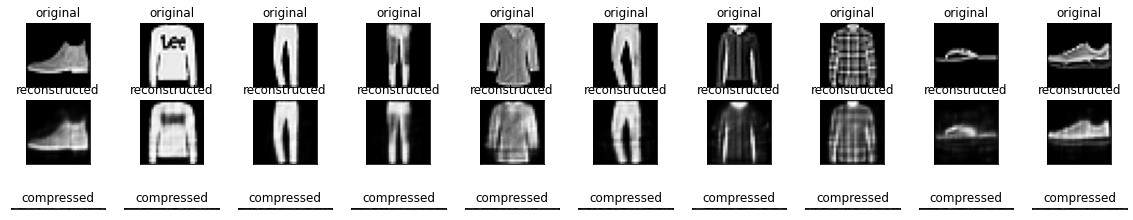

In [14]:
n = 10   
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n + n)
  plt.imshow(encoded_imgs[i][np.newaxis])
  plt.title("compressed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

###  Denoising Autoencoder
- 고유한 특성으로 압축되어서 다시 복원하니 렌덤 노이즈는 특성이 아닌 abnormal임으로 제거

In [16]:
#랜덤하게 노이즈 추가
noise_factor = 0.2  #노이즈 정도
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)   #이미지에 랜덤값에 노이즈 정도를 곱해서 더해서 추가
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

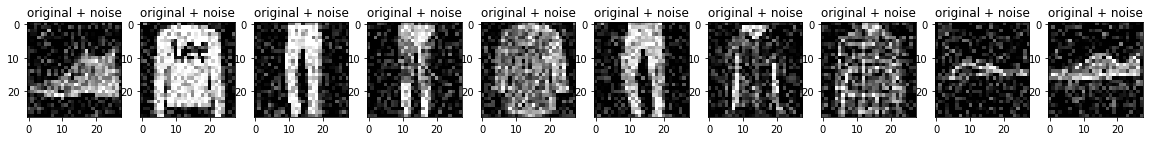

In [17]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [18]:
autoencoder3= Autoencoder(latent_dim)
autoencoder3.compile(optimizer='adam', loss=losses.BinaryCrossentropy()) 
autoencoder3.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3237 - val_loss: 0.3008
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2909 - val_loss: 0.2897
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2854 - val_loss: 0.2864
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - val_loss: 0.2854
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2824 - val_loss: 0.2847
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2818 - val_loss: 0.2840
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2815 - val_loss: 0.2839
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2812 - val_loss: 0.2838
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2810 - val_loss: 0.2836
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.280

In [19]:
encoded_imgs = autoencoder3.encoder(x_test).numpy() 
decoded_imgs = autoencoder3.decoder(encoded_imgs).numpy()

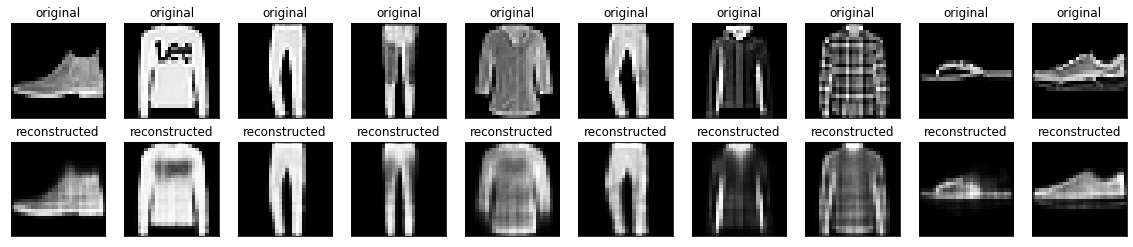

In [21]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

### Convolutional Autoencoder
- 이미지에 사용하는 autoencoder 성능 개선
- 원본 이미지에서 고유한 특성을 찾아내서 특성 기반으로 복원하는데 자기 자신의 데이터 활용해서 중요
    - object detecion 확장판 다룰 예정

### convolution
- deconvolution
  - convolution 과정을 반대로함
- Upsampling2D
  - bilinear, nearest 기반 interpolation으로 resize로 늘림
- **Conv2DTranspose**
  - 축약된 값을 다시 복원하는것을 **학습을 통해서** 가장 비슷한 값 찾음
  - Conv2D 반대로 축소된것을 복원하는 방법

> - dilated convolution(묽은)
  - `tf.keras.layers.Conv2D(dialtion_rate = )`
  - convolution 할때 촘촘하게가 아닌 필터 내부에 zero padding을 추가해 강제로 receptive field를 더 넓은 범위를 하나로 확장
    - segmentation: 빠르게 찾음
    
- pooling 대신에 stride이용해서 sampling

In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis] #흑백 이미지 차원 추가
x_test = x_test[..., tf.newaxis]

print(x_train.shape)
#노이츠 추가
noise_factor = 0.2 
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


In [4]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 

      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),  # pooling 대체
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
    
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),# Upsamling2D -> Conv2DTranspose 
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      #1 : 크기 맞추기 원본 -> 원본
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

다른모델 같은 loss로는 비교 가능

In [5]:
#구조 바뀌면 컴파일 다시
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [6]:
autoencoder.fit(x_train_noisy, x_train,  #라벨없이 학습
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)) #MSE 비교 

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0193 - val_loss: 0.0116
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0103 - val_loss: 0.0095
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0090 - val_loss: 0.0087
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0083 - val_loss: 0.0084
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0082 - val_loss: 0.0082
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0081 - val_loss: 0.0082
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.008

In [8]:
encoded_imgs = autoencoder.encoder(x_test).numpy() #객체내에서 모델로 분리되어있어서 사용 가
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

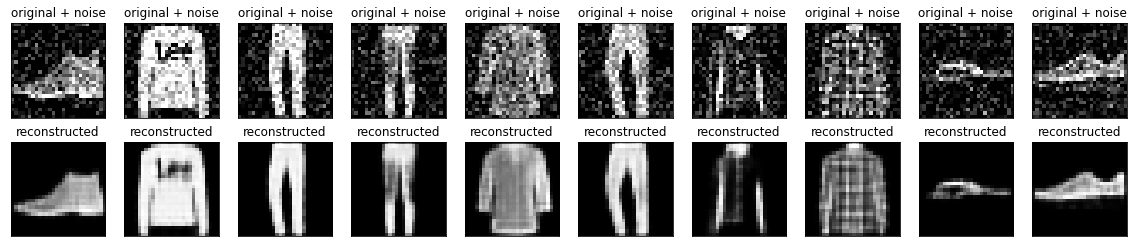

In [9]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False) 
plt.show()

### Variational Autoencoder
- VAE
- 정확한 값을 구할수 없기 때문에 근사적 추론(통계)
- PRML(Pattern Recognition and Machine Learning by Bishop)책 참고
  - 확률기반 DNN

---
## Generative Adversarial Network
> - knowledge distillation(2015)
      - teacher model -> studnet model에세 '필요한 지식만 전달'해서 간단한 모델에서도 복잡한 모델만큼 특정 태스크에 성능 좋음(조력자의 도움)

- 두개의 모델이 적대적인 경쟁 통해 학습
- self-suprevised learning  핵심 
    - Generator (위조범): 진짜처럼 보이는 이미지를 생성하도록 학습
    - Discriminator (위조 감별사): 가짜의 이미지로부터 진짜를 구별하게 되는 것을 학습
        - 학습과정에서는 피드백을 주어 점차 능력을 키움
    - Discriminator 가짜 이미지에서 진짜 이미지를 더이상 구별하지 못하게 될때, 평형상태에 도달

> - Yann lecun이 최고의 알고리즘이라고 극찬
- GAN 학습이 잘 안되어서(underfitting) learning technique 중요

 > 튜토리얼 참고: NIPS2016 Tutorial: Fenerative Adversarial Networks by Ian Goodfellow(2017)
- cherry pricking 만연 (선별적으로 좋은 결과만 선택)
  - 과학은 재현가능성이 보장되야 한다.
  - 데이터에 따라서 결과가 조금 다르게( data dependent)나와서 100% 재현 불가능한것에 대해서 악용 
    - 예. 통계 p값  

In [1]:
import tensorflow as tf

### Generator
- 가짜 mnist 데이터 만듦

In [2]:
generator= tf.keras.models.Sequential([ 
          tf.keras.layers.Dense(256, input_shape=(200,),activation='relu'),
                    tf.keras.layers.Dense(512,activation='relu'),
                    tf.keras.layers.Dense(784,activation='relu')
])

### Discriminator
- 가짜 데이터 구분

In [3]:
#학습해서 능력 키움  ; 학습을 못하게 할수 있음
discriminator=tf.keras.models.Sequential([
                      tf.keras.layers.Dense(1024,input_shape=(784,),activation='relu'),
                      tf.keras.layers.Dense(512,activation='relu'),
                      tf.keras.layers.Dense(256,activation='relu'),


                      tf.keras.layers.Dense(1,activation='sigmoid') # 진짜/가짜 판별
])

In [4]:
#각자의 학습 전략
generator.compile(loss='binary_crossentropy',optimizer='adam')
discriminator.compile(loss='binary_crossentropy',optimizer='adam')

동시에 학습하는것이 아닌 generator 먼저 학습 시킴

In [5]:
discriminator.trainable=False #학습 못하게함

전체 하나의 모델

In [6]:
gan_input=tf.keras.Input(shape=(200,))

x= generator(gan_input)
gan_output= discriminator(x)

In [7]:
gan=tf.keras.models.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy',optimizer='adam')

In [8]:
gan.summary()  # generator : 200개 -> 784  discriminator 784 -> 1
#모델을 붙여놔서 학습은 안되었지만..어떻게 학습?

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               585232    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1460225   
Total params: 2,045,457
Trainable params: 585,232
Non-trainable params: 1,460,225
_________________________________________________________________


generator가 이미지를 생성하면 discriminator가 판별하는 구조

In [9]:
#200개 데이터 100개
import numpy as np
sample=np.random.random((100,200))   #이미지에 랜덤값에 노이즈 정도를 곱해서 더해서 추가
len(np.random.random((100,200)) ) #(100,200)

100

In [10]:
generator( sample )   #generator가 생성한 이미지

<tf.Tensor: shape=(100, 784), dtype=float32, numpy=
array([[0.19602136, 0.07444058, 0.00328773, ..., 0.        , 0.01667894,
        0.5499405 ],
       [0.18263571, 0.21462663, 0.06947816, ..., 0.        , 0.        ,
        0.37902325],
       [0.3005703 , 0.10124515, 0.        , ..., 0.        , 0.        ,
        0.46303713],
       ...,
       [0.34227738, 0.23153813, 0.        , ..., 0.        , 0.        ,
        0.26616067],
       [0.08900665, 0.05610302, 0.0955317 , ..., 0.        , 0.        ,
        0.40654424],
       [0.06500205, 0.05898733, 0.09235311, ..., 0.        , 0.00266417,
        0.29676336]], dtype=float32)>

학습하지 않은 generator가 만든 데이터

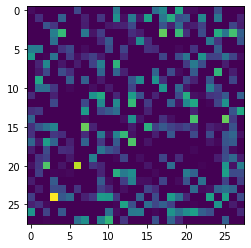

In [14]:
import matplotlib.pyplot as plt
plt.imshow( generator(sample)[0].numpy().reshape(28,28)) #generator가  생성한 데이터

학습하지 않은 discriminator의 판단
- 거의 random guess

In [11]:
discriminator( generator(sample)) # discriminator가 위의 데이터 판별, 모두 .5 안팎

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[0.5331197 ],
       [0.5369414 ],
       [0.51737475],
       [0.5307577 ],
       [0.53197074],
       [0.5323575 ],
       [0.52467495],
       [0.5311158 ],
       [0.5312212 ],
       [0.5290405 ],
       [0.5382603 ],
       [0.52679473],
       [0.53357255],
       [0.5170715 ],
       [0.5310257 ],
       [0.52923   ],
       [0.5365701 ],
       [0.53369695],
       [0.52259076],
       [0.5298503 ],
       [0.5340077 ],
       [0.5376623 ],
       [0.53151876],
       [0.51186025],
       [0.53185993],
       [0.53281283],
       [0.53812915],
       [0.52174073],
       [0.5367978 ],
       [0.53379107],
       [0.531592  ],
       [0.5257361 ],
       [0.52388436],
       [0.5334397 ],
       [0.52334064],
       [0.53154355],
       [0.52972776],
       [0.5320899 ],
       [0.52760106],
       [0.51265943],
       [0.5363257 ],
       [0.5188002 ],
       [0.5425057 ],
       [0.53049624],
       [0.5283562 ],
     

### 데이터 
mnist 가짜 데이터 만들어서  mnist 데이터와 가짜데이터 답을 주고 학습하라고 해서 학습능력
- (실제 데이터, 가짜 데이터) 구성된 학습 데이터와 라벨 만듦 


In [24]:
#진짜 데이터
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.mnist.load_data() #0-9까지 데이터를 만듦.
x_train = x_train.reshape(-1,28*28)

In [13]:
x_train.shape 

(60000, 28, 28)

- fit 은 전체 학습 시키므로 bach size만큼 학습 시켜야함
- batch size 크기에따라 메모리, 학습 속도 trade-off

In [25]:
#batch size만큼 학습 시킬 예정
batchsize=x_train.shape[0]//128
batchsize

468

가짜데이터 생성

In [26]:
fake=np.random.normal(0,1,size=[batchsize,200]) # normal dist ( 0,1) 200개짜리 batch size만큼 있음
fake.shape

(468, 200)

In [27]:
image_batch=x_train[np.random.randint(0, x_train.shape[0],size=batchsize)] #랜덤하게
image_batch#(468, 28, 28) 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [28]:
image_batch.shape

(468, 784)

In [29]:
generator(fake).shape #generator가 가짜이미지 만듦

TensorShape([468, 784])

- 진짜 데이터와 가짜 데이터로 하나의 데이터 셋 구성

In [30]:
x=np.concatenate([image_batch,generator(fake)]) #(936, 784)

In [24]:
image_batch

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [31]:
y=np.zeros(2*batchsize) # 진짜1, 가짜 0

In [32]:
y[:batchsize]=0.9 #image_batch 90%로 진짜 generator(fake) 0%(가짜)

In [38]:
y_gen =np.ones(batchsize) # 학습 목표 = 1:진짜 데이터라고 가정해야함

### 학습
- 두 모델을 번갈아 가면서 학습해야해서 trainable 조절해서 학습
    - discriminator:((mnist, generated mnist), (0.9,0))
    - generator (random data,1)
- 너무 간단한 모델이라서 학습이 잘 안됨.
#### train_on_batch
- fit은 전체를 하기때문에 batch size 만큼 학습 

In [33]:
discriminator.trainable=True #학습 시키도록 함

In [34]:
discriminator.train_on_batch(x,y)

3.2187411785125732

In [35]:
discriminator.train_on_batch(x,y)

82.5296859741211

In [36]:
discriminator.trainable=False #학습 안 시킴

In [37]:
generator.trainable=True

In [ ]:
generator.train_on_batch(fake,y_gen)

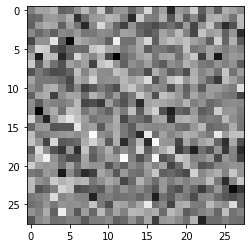

In [ ]:
plt.imshow(generator(fake)[10].numpy().reshape(28,28))# 결과...

결과를 보면 학습이 잘 되지 않음.
- relu(rectified) (0,x) 비선형성 간단해서 속도도 빠름
- GAN학습이 안되는 것은 0에 가까운 값은 0 가까이 전달됨
     - LeackyReLU  (x/100 ,x) 좀 더 잘됨
     - Batch Normalization